# Εργασία στο μάθημα Αναγνώριση Προτύπων
# 1ο Παραδοτέο
***
<font size="4">Χριστίνα Κούτση 9871
Ευσεβεία Νεστοροπούλου 9703</font>

***
# Μέρος Α
***

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm

In [2]:
# Definition of mean and covariance matrices
mu = [[0.4, 0.8], [1.5, 2.7]]
cov = [[1.5, 0], [0, 0.8]]

# Definition of P(w1), P(w2)
p_w1 = 0.95
p_w2 = 0.05

N = 2000 #x1,x2 sample size 
dx1 = 0.01 #unit vector dx1 
dx2 = 0.01 #unit vector dx2

<font size="4.5">**1. Παρουσιάστε στους γιατρούς τις τιμές των κατανομών $p(\textbf{x}|ω_1)$ και $p(\textbf{x}|ω_2)$ για διακριτές τιμές $\textbf{x}$.**</font>
***
Αρχικά, ορίζουμε τις μετρικές $x_1,x_2$ ως δείγματα μεγέθους (2000,1) στο διάστημα [-10,10]. Στη συνέχεια, για κάθε κλάση $ω_1$ και $ω_2$ προσαρμόζουμε το διάνυσμα $\textbf{x}=[x_1,x_2]$ σε κανονική τιμή με μέση τιμή $μ_1$ και $μ_2$ αντίστοιχα και διασπορά Σ. Τέλος, απεικονίζουμε γραφικά τις κατανομές $p(\textbf{x}|ω_1)$ και $p(\textbf{x}|ω_2)$ για τις δύο κλάσεις. 

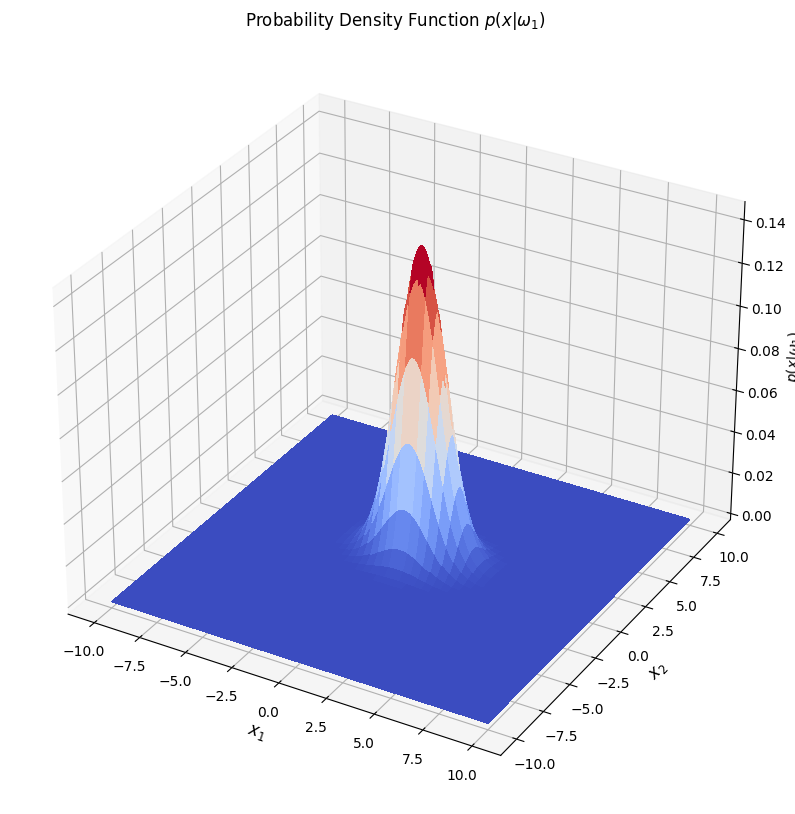

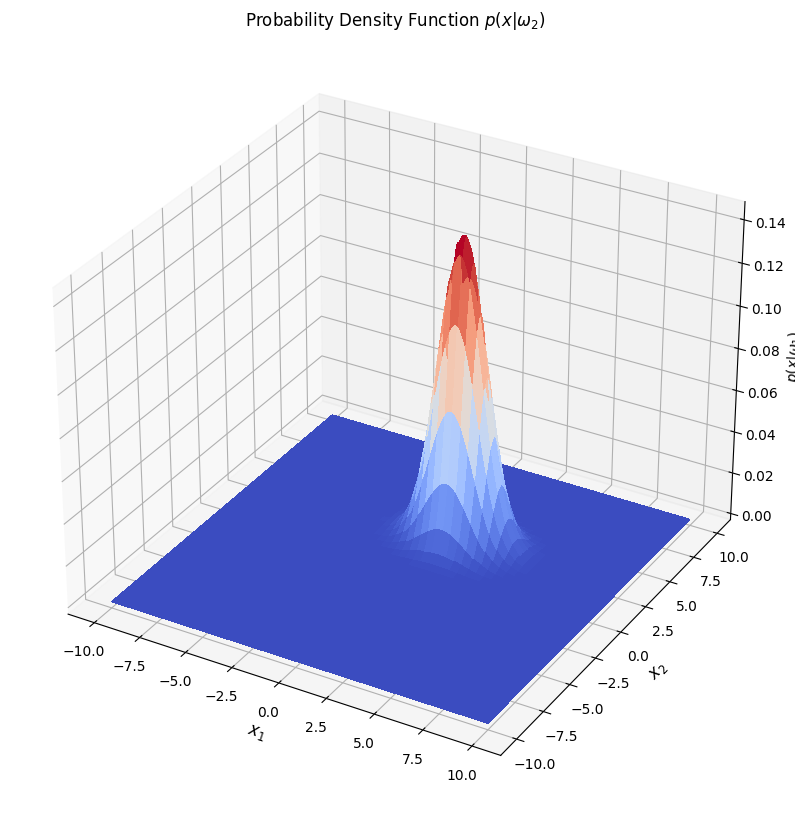

In [3]:
p_x_w = np.zeros((N,N,2))

for i in range(len(mu)):
    x1, x2 = np.mgrid[-10:10:dx1, -10:10:dx2]
    y = multivariate_normal(mu[i],cov)
    pos = np.dstack((x1,x2))
    p_x_w[:,:,i] = y.pdf(pos)
    
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_x_w[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$p(x|ω_1)$')

    if i==0:
        axes.set_title(r'Probability Density Function $p(x|ω_1)$')
    elif i==1:
        axes.set_title(r'Probability Density Function $p(x|ω_2)$')

    plt.show()

<font size="4.5">**2. Υπολογίστε την ολική κατανομή πιθανότητας και παρουσιάστε τη.**</font>
***
Η ολική κατανομή πιθανότητας σύμφωνα με την θεωρία δίνεται από τον τύπο
$$ P(\textbf{x}) = \sum_{i}^{}[P(\textbf{x}|ω_i)P(ω_i)],i=1,2$$ 
Πολλαπλασιάζουμε την κάθε κατανομή $P(\textbf{x}|ω_i)$ με την αντίστοιχη a priori πιθανότητα $P(ω_i)$ και στη συνέχεια τις προσθέτουμε. Τέλος, απεικονίζεται γραφικά η ολική πιθανότητα $P(\textbf{x})$

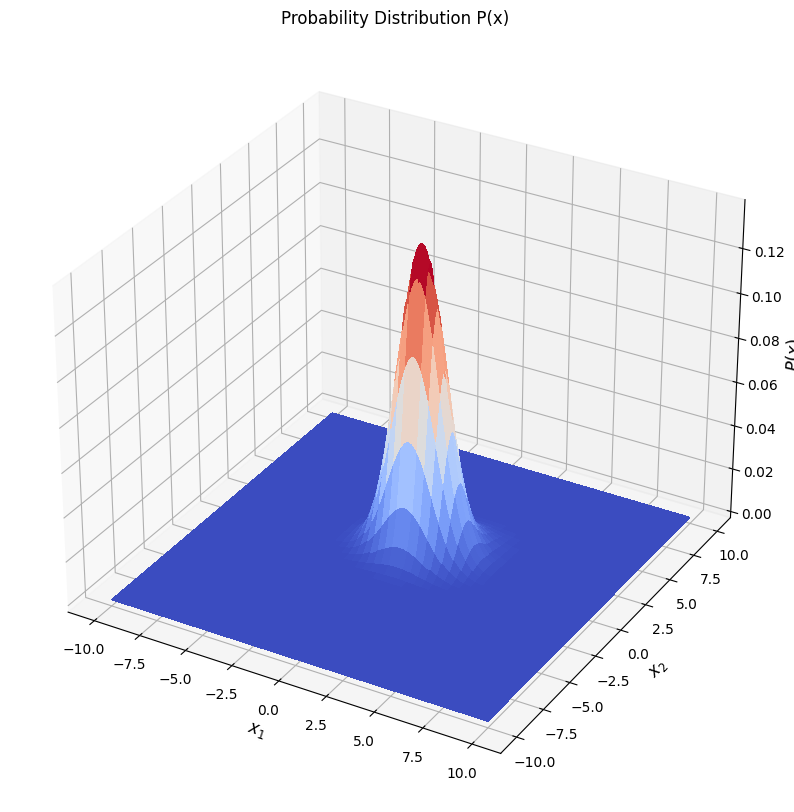

In [4]:
p_x = np.zeros((N,N,2))

p_x[:,:,0] = p_x_w[:,:,0]*p_w1
p_x[:,:,1] = p_x_w[:,:,1]*p_w2

p_x = np.sum(p_x, axis=2)
    
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=p_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')

plt.show()

<font size="4.5">**3. Υπολογίστε τις a posteriori πιθανότητες $P(ω_1|\textbf{x})$ και $P(ω_2|\textbf{x})$ και συμπεριλάβετέ τις στην παρουσίασή σας.**</font>
***
Οι ζητούμενες πιθανότητες δίνονται, σύμφωνα με την θεωρία από τον παρακάτω τύπο:
$$ P(ω_i|\textbf{x}) = \dfrac{P(\textbf{x}|ω_i)P(ω_i)}{P(\textbf{x})},i=1,2$$ 
Εφαρμόζουμε την παραπάνω πράξη και απεικονίζουμε γραφικά τις δύο πιθανότητες $P(ω_1|\textbf{x})$ και $P(ω_2|\textbf{x})$

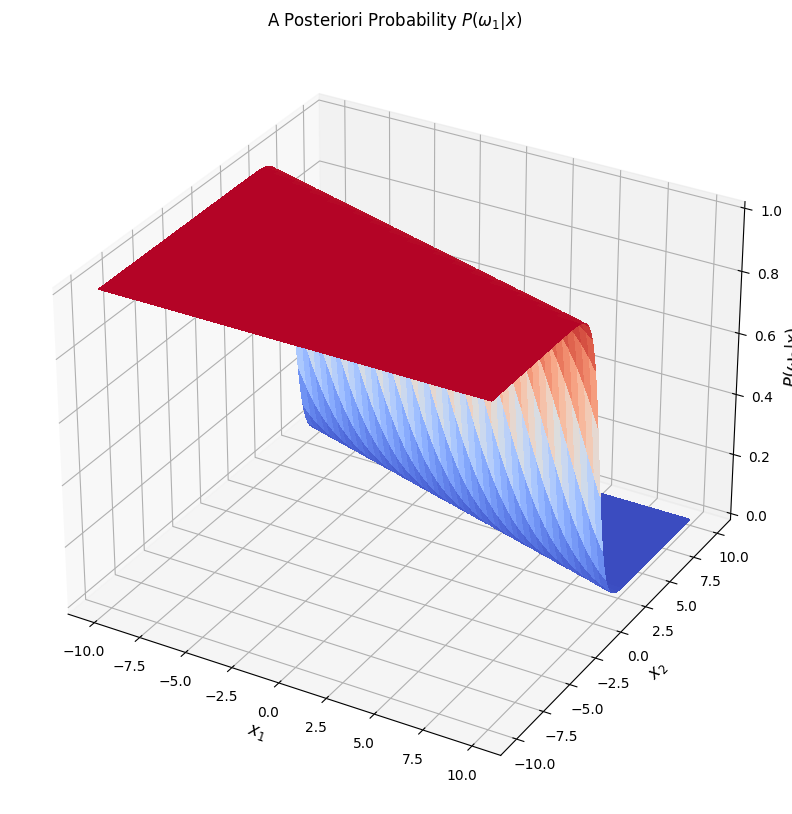

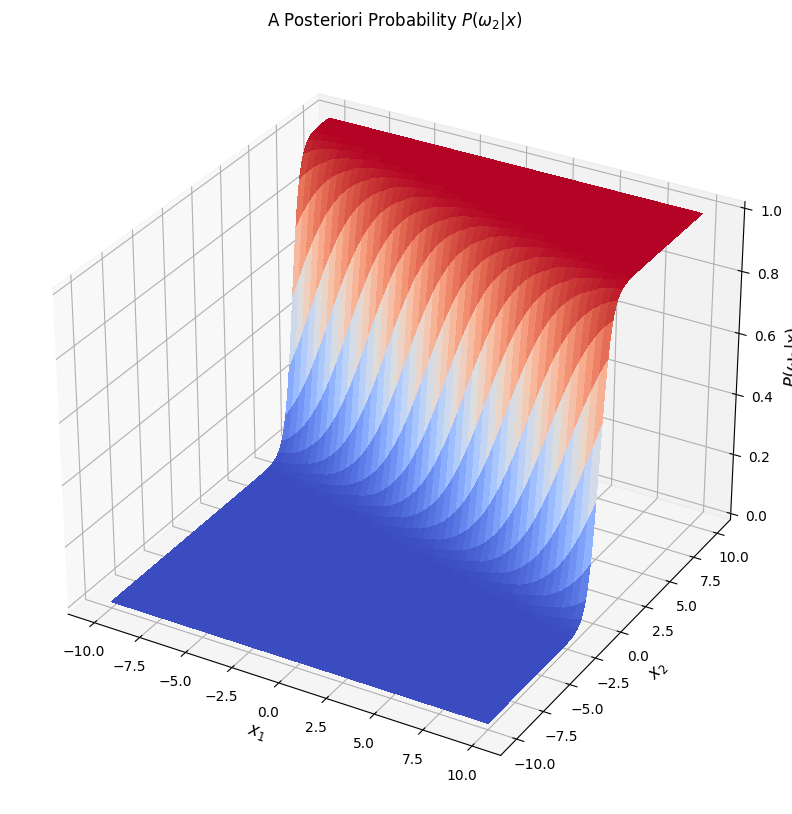

In [5]:
p_w_x= np.zeros((N,N,2))

p_w_x[:,:,0] = p_x_w[:,:,0]*p_w1/p_x
p_w_x[:,:,1] = p_x_w[:,:,1]*p_w2/p_x

for i in range(2): 
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_w_x[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')

    if i==0:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probability $P(ω_1|x)$',fontsize='large')
    elif i==1:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probability $P(ω_2|x)$',fontsize='large')

    plt.show()

<font size="4.5">**4. Υπολογίστε το σφάλμα κατά Bayes. Κάνετε ένα σχόλιο για το σφάλμα που παρατηρείτε.**</font>
***
Το σφάλμα κατα Bayes δίνεται από τον τύπο:

$$P(error) = \int_{\textbf{x}} P(error|\textbf{x})P(\textbf{x}) \, d\textbf{x} $$
όπου $$P(error|\textbf{x}) = min[P(ω_1|\textbf{x}), P(ω_2|\textbf{x})]$$
Επειδή τα $x_1,x_2$ παίρνουν διακριτές τιμές, ο παραπάνω τύπος γίνεται
$$P(error) = \sum_{x_1}^{}\sum_{x_2}^{} P(error|\textbf{x})P(\textbf{x})dx_1dx_2$$
Υπολογίζουμε το σφάλμα με τον παραπάνω τύπο:

In [6]:
error = np.sum(np.amin(p_w_x,axis=2)*p_x*dx1*dx2)

print('Bayes Error = %.4f' % error)

Bayes Error = 0.0346


**Παρατηρήσεις**
***
- Το σφάλμα κατά Bayes είναι η πιθανότητα λανθασμένης απόφασης (misclassification). Στόχος μας είναι να ελαχιστοποιήσουμε το σφάλμα όσο το δυνατόν περισσότερο. Ιδιαίτερα όταν πρόκειται για ιατρικά δεδομένα, επιθυμούμε τα αποτελέσματα να είναι όσο το δυνατόν πιο κοντά στην πραγματικότητα και οι αποφάσεις να είναι όσο το δυνατόν πιο ορθές. Το σφάλμα που προκύπτει για τα συγκεκριμένα δεδομένα είναι αρκετά μικρό.
- Σε έναν ιδανικό ταξινομητή, η τιμή του σφάλματος τείνει στο μηδέν. Ωστόσο, αυτό είναι πολύ δύσκολο να επιτευχθεί στην πραγματικότητα, οπότε συνήθως το σφάλμα είναι μεγαλύτερο του μηδενός και προσπαθούμε με τις κατάλληλες προσαρμογές να το ελαχιστοποιήσουμε.
- Παρατηρώντας τις κατανομές των πιθανοτήτων $P(ω_1|x)$ και $P(ω_2|x)$ βλέπουμε ότι έχουν την μορφή ράμπας. Η τιμή των πιθανοτήτων ισούται με 1 και 0 σε κάποια διαστήματα και σε κάποια διαστήματα λαμβάνει τιμές μέσα στο διάστημα [0,1]. Ιδανικά, θα θέλαμε οι πιθανότητες να λαμβάνουν μόνο τις τιμές 0 και 1 ώστε να μηδενιστεί το σφάλμα. Δηλαδή, θα θέλαμε η ράμπα που σχηματίζουν οι κατανομές να έχει όσο το δυνατόν μεγαλύτερη κλίση. Επιπλέον, θα θέλαμε οι κατανομές πιθανοτήτων $P(ω_1|x)$ και $P(ω_2|x)$ να έχουν όσο το δυνατόν λιγότερη αλληλεπικάλυψη γίνεται ώστε το σφάλμα να είναι ελάχιστο.

***
# Μέρος Β
***
Επαναλαμβάνουμε την ίδια διαδικασία (βήματα 1-4). Σε αυτήν την περίπτωση, η διασπορά της $ω_2$ έχει υποτετραπλασιαστεί.

In [7]:
cov = np.array([[1.5, 0], [0, 0.8]])
cov = [cov, cov/4]

<font size="4.5">**1. Παρουσιάστε στους γιατρούς τις τιμές των κατανομών p(x|ω1) και p(x|ω2) για διακριτές τιμές x.**</font>
***

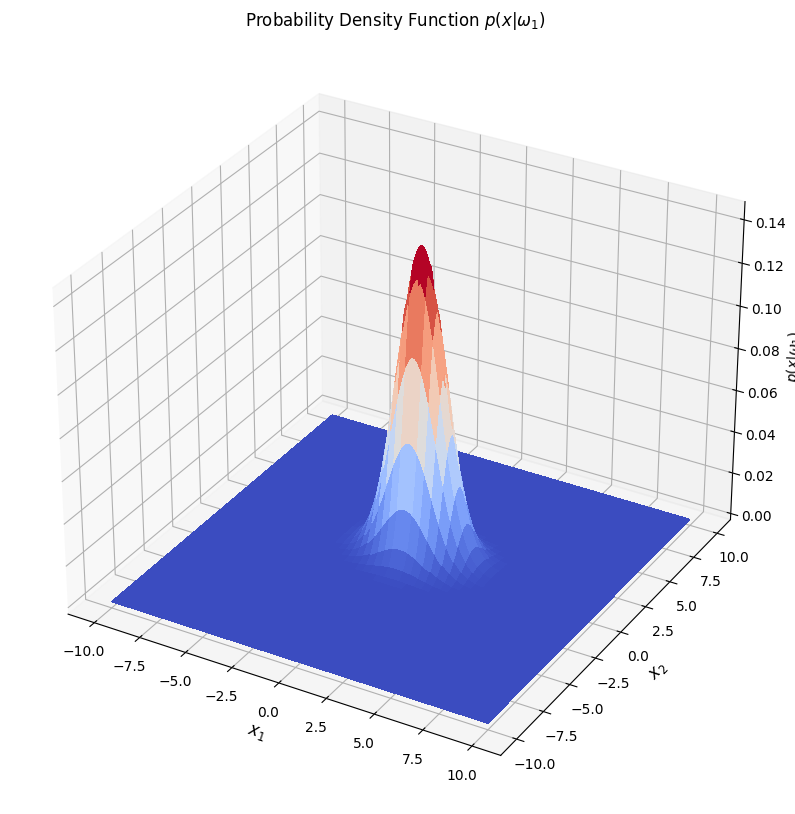

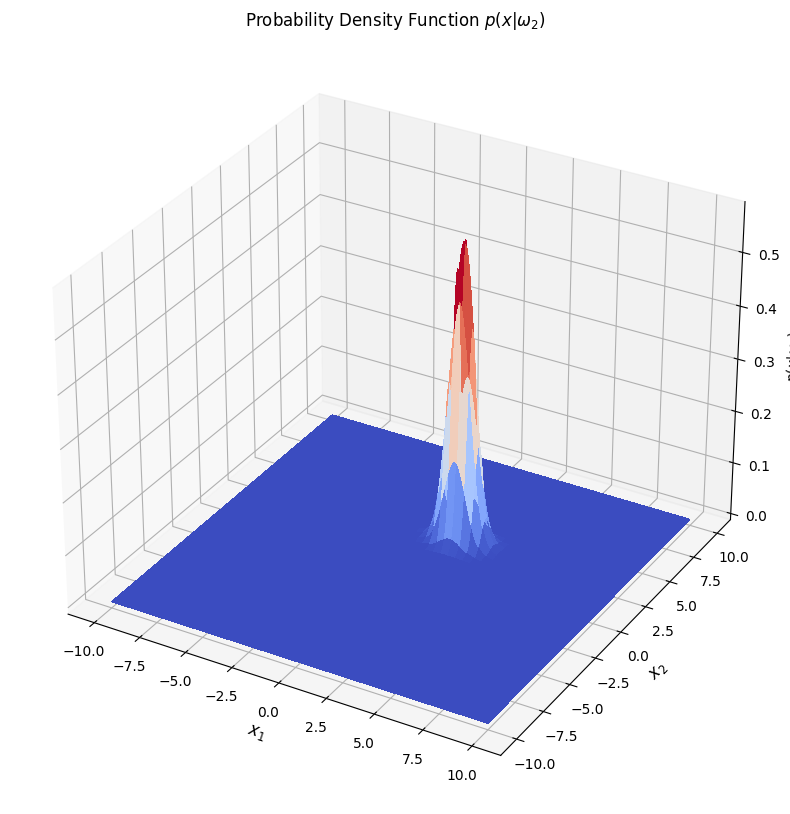

In [8]:
p_x_w = np.zeros((N,N,2))

for i in range(len(mu)):
    x1, x2 = np.mgrid[-10:10:dx1, -10:10:dx2]
    y = multivariate_normal(mu[i],cov[i])
    pos = np.dstack((x1,x2))
    p_x_w[:,:,i] = y.pdf(pos)
    
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_x_w[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$p(x|ω_1)$')

    if i==0:
        axes.set_title(r'Probability Density Function $p(x|ω_1)$')
    elif i==1:
        axes.set_title(r'Probability Density Function $p(x|ω_2)$')

    plt.show()

<font size="4.5">**2. Υπολογίστε την ολική κατανομή πιθανότητας και παρουσιάστε τη.**</font>
***

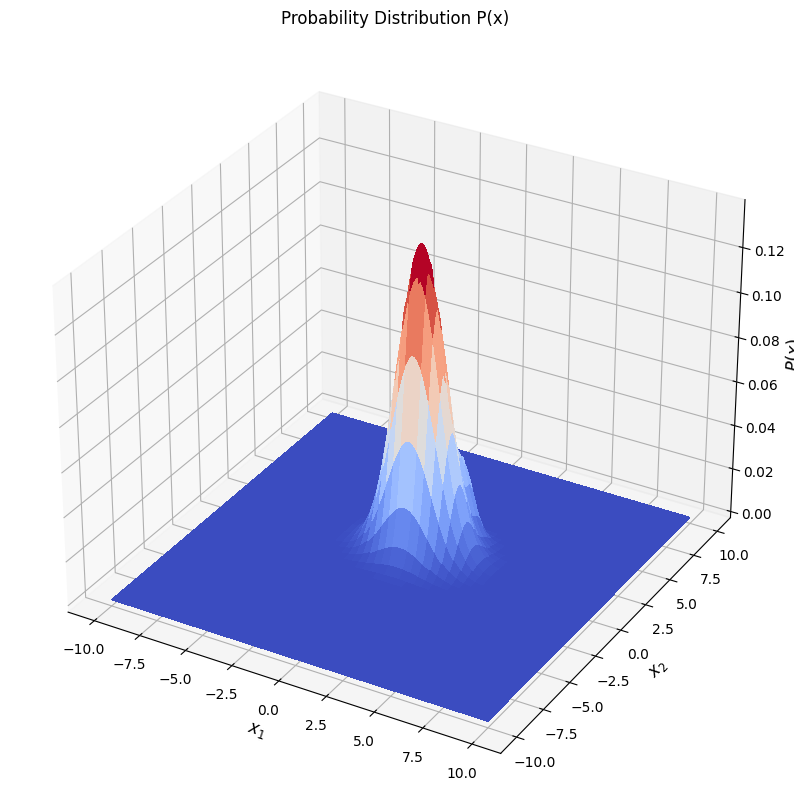

In [9]:
p_x = np.zeros((N,N,2))

p_x[:,:,0] = p_x_w[:,:,0]*p_w1
p_x[:,:,1] = p_x_w[:,:,1]*p_w2

p_x = np.sum(p_x, axis=2)
    
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=p_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')

plt.show()

<font size="4.5">**3. Υπολογίστε τις a posteriori πιθανότητες $P(ω_1|\textbf{x})$ και $P(ω_2|\textbf{x})$ και συμπεριλάβετέ τις στην παρουσίασή σας.**</font>
***

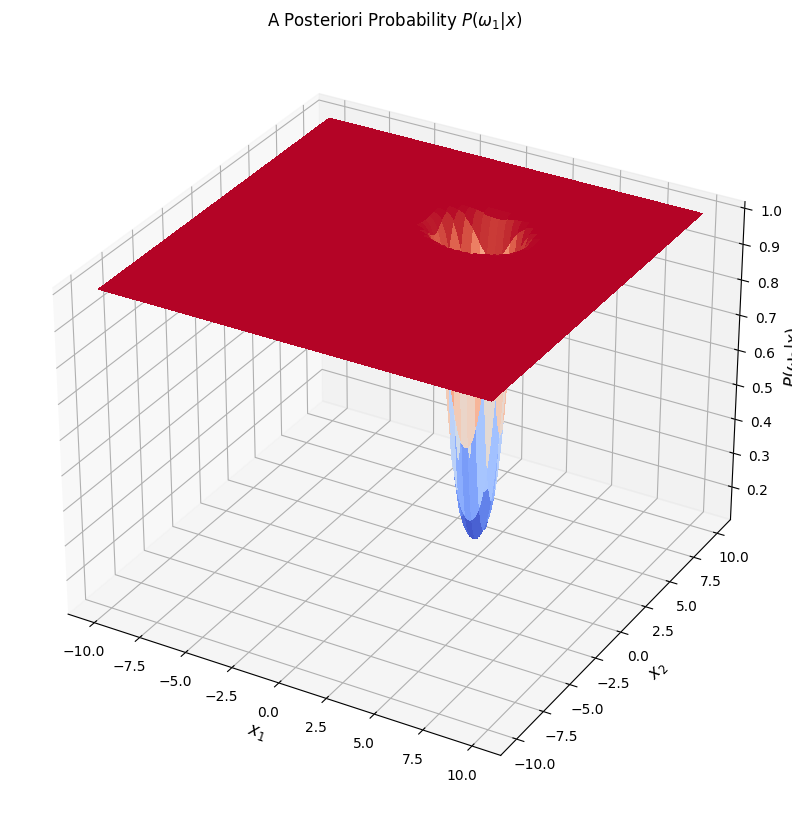

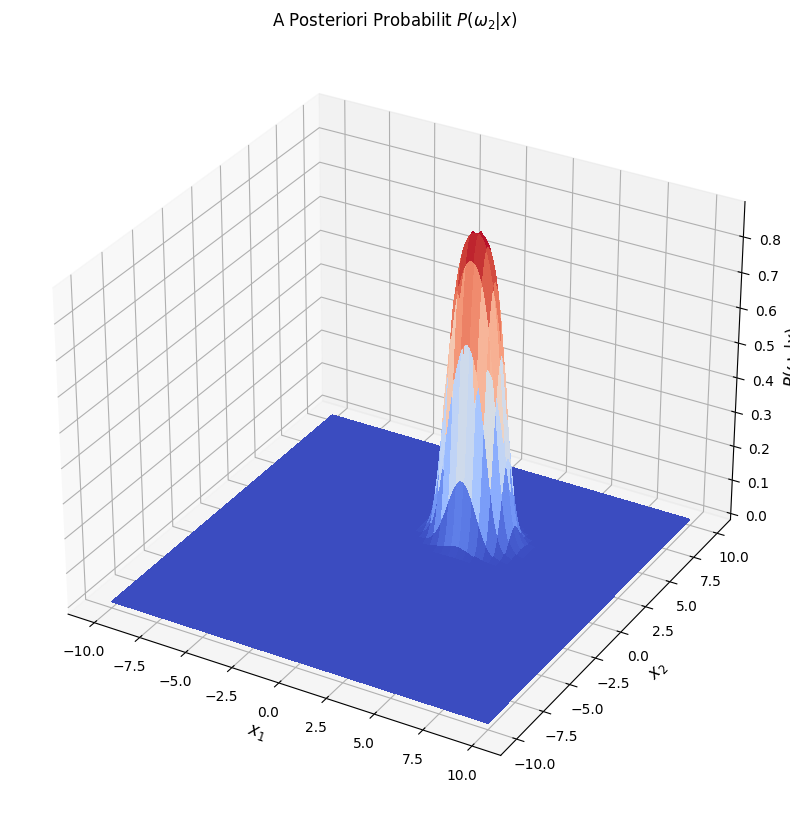

In [10]:
p_w_x= np.zeros((N,N,2))

p_w_x[:,:,0] = p_x_w[:,:,0]*p_w1/p_x
p_w_x[:,:,1] = p_x_w[:,:,1]*p_w2/p_x

for i in range(2): 
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_w_x[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')

    if i==0:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probability $P(ω_1|x)$',fontsize='large')
    elif i==1:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probabilit $P(ω_2|x)$',fontsize='large')

    plt.show()

<font size="4.5">**4. Υπολογίστε το σφάλμα κατά Bayes. Κάνετε ένα σχόλιο για το σφάλμα που παρατηρείτε.**</font>

In [11]:
error = np.sum(np.amin(p_w_x,axis=2)*p_x*dx1*dx2)

print('Bayes Error = %.4f' % error)

Bayes Error = 0.0290


**Παρατηρήσεις**
***
- Στο Μέρος Β το σφάλμα έχει μειωθεί αισθητά σε σχέση με το σφάλμα στο Μέρος Α. Πιο συγκεκριμένα, στο Μέρος Α είχαμε σφάλμα 0.0346 ενώ τώρα 0.0290.Αυτό οφείλεται, προφανώς, στην μείωση της διασποράς της κλάσης ω2. Είναι λογικό, καθώς, όσο μικρότερη η διασπορά των δεδομένων μίας κλάσης, τόσο πιο σίγουροι είμαστε για την απόφαση μας. Υπάρχει λιγότερος θόρυβος, άρα και μικρότερο σφάλμα. 
- Η αλληλεπικάλυψη μεταξύ των κατανομών P(ω1|x) και P(ω2|x) έχει επίσης μειωθεί, προκαλώντας μείωση στο σφάλμα. Συγκεκριμένα, σε μια μεγάλη περιοχή οι κατανομές P(ω1|x) και P(ω2|x) έχουν τις τιμές 1 και 0 αντίστοιχα, προκαλώντας μηδενικό σφάλμα. Παρατηρούμε όμως δραματική αλλαγή της τιμής της πιθανότητας σε μια μικρή περιοχή, όπου η πιθανότητα παίρνει την μορφή κανονικής κατανομής , που όμως έχει μικρό αντίκτυπο στο σφάλμα καθώς η διασπορά είναι μικρή. 